In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [3]:
x.shape

(500, 2)

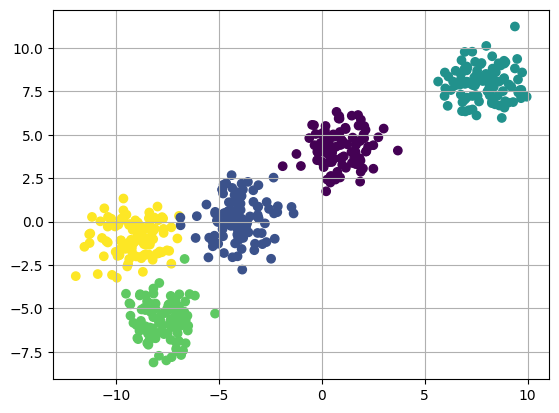

In [4]:
plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)

In [5]:
k=5 

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for i in range(k):
    center = 10*(2*np.random.random(x.shape[1])-1)
    points =[]
    cluster ={
         'center':center,
        'points':[],
        'color':colors[i],
    }
    clusters[i]=cluster

In [6]:
clusters

{0: {'center': array([-8.80546028,  4.99233177]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-7.84133752, -1.79578108]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-0.30774874,  6.54786247]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([5.14071217, 1.09679509]), 'points': [], 'color': 'cyan'},
 4: {'center': array([ 0.33181671, -7.09454425]),
  'points': [],
  'color': 'red'}}

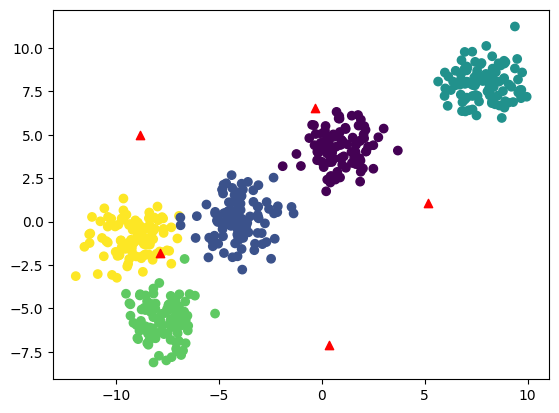

In [7]:
plt.scatter(x[:,0],x[:,1],c=y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker='^',c='red')


plt.show()

In [8]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [9]:
v1 = np.array([1,2])
v2 = np.array([3,4])

distance(v1,v2)

2.8284271247461903

In [10]:
#Implementing E-step

def assign_clusters():
    for idx in range(x.shape[0]):
        dist=[]

        curr_x = x[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)

        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [11]:
assign_clusters()

In [12]:
clusters

{0: {'center': array([-8.80546028,  4.99233177]),
  'points': [array([-4.64175137,  2.20728992]),
   array([-4.38019548,  2.67413973]),
   array([-4.76912553,  2.12737896])],
  'color': 'green'},
 1: {'center': array([-7.84133752, -1.79578108]),
  'points': [array([-6.94238952, -6.8807223 ]),
   array([-3.61995355, -0.07726913]),
   array([-8.91918262, -6.772189  ]),
   array([-7.37151112, -5.0506429 ]),
   array([-4.65743008,  0.05077508]),
   array([-9.85614721, -1.94829844]),
   array([-7.03064028, -7.47212242]),
   array([-6.74761638, -5.40793452]),
   array([-3.8987193 ,  0.15219193]),
   array([-6.83038032, -7.68741713]),
   array([-4.65780461,  0.51339663]),
   array([-9.14747586, -5.83583269]),
   array([-6.67147607, -5.89031942]),
   array([-7.33837507, -5.9643993 ]),
   array([-7.82304106, -6.34230341]),
   array([-3.78877994, -0.0248327 ]),
   array([-6.60607411, -5.67971605]),
   array([-10.3969262 ,  -0.28827972]),
   array([-9.18719238, -0.47349654]),
   array([-4.4565053

## Plot clusters

In [13]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])

        try:
            plt.scatter(pts[:,0],pts[:,1],c= clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c='black',marker='^')

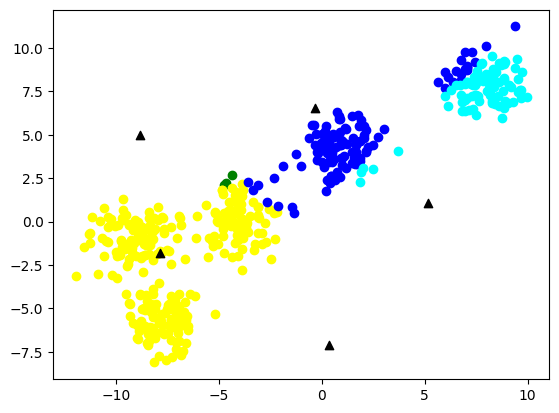

In [14]:
plot_clusters()

## Updating the center location by taking the means

In [15]:
#Implementing M-step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)            
            clusters[idx]['center'] = new_center
            clusters[idx]['points'] = []

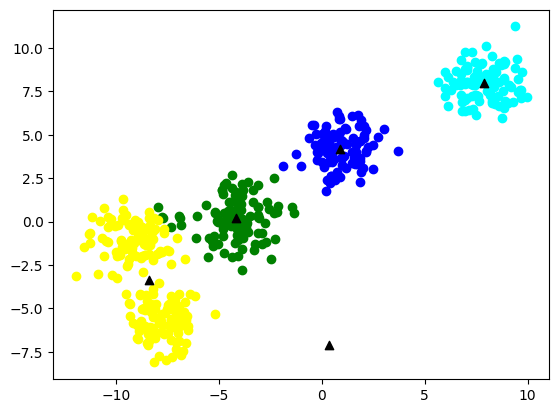

In [21]:
assign_clusters()
plot_clusters()
update_clusters()

## scikit K-Means

In [22]:
from sklearn.cluster import KMeans

In [23]:
km  = KMeans(n_clusters=5)

In [24]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [25]:
km.fit(x,y)

C:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [35]:
centers = km.cluster_centers_

In [31]:
labels = km.labels_

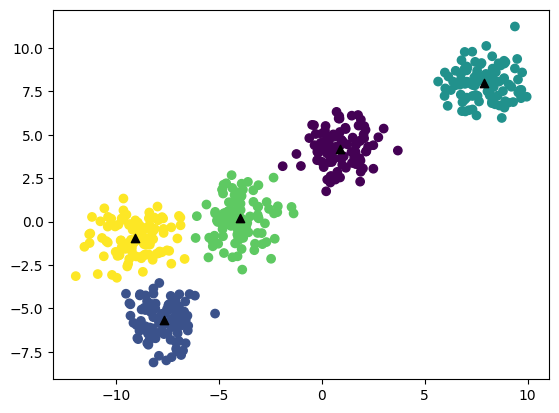

In [40]:
plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='black',marker="^")
plt.show()